# Class activities

## Activity 1: Exploring decision boundaries

(0.0, 0.0931372549019607)

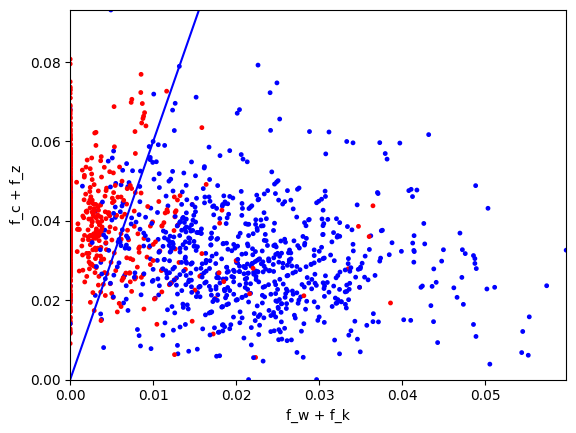

In [3]:
import matplotlib.pyplot as plt
import linear_utils as lu

X_train, X_test, y_train, y_test = lu.load_language_dataset()

X_train['f_wk'] = X_train.f_w + X_train.f_k
X_train['f_cz'] = X_train.f_c + X_train.f_z

plt.scatter(X_train.f_wk,  X_train.f_cz, c=y_train.map({'Spanish': 'red', 'English': 'blue'}), s=6)
plt.xlabel('f_w + f_k')
plt.ylabel('f_c + f_z')

w_0 = 0
w = [6, -1]

lu.plot_line_square(w_0, w, X_train.f_wk.min(), X_train.f_wk.max())
plt.xlim([X_train.f_wk.min(), X_train.f_wk.max()])
plt.ylim([X_train.f_cz.min(), X_train.f_cz.max()])

## Activity 2: Perceptron loss

Examine and execute this cell. It will train a linear model with the perceptron loss.

In [4]:
# Sklearn is a machine learning library that provides implementations
# of many linear classification algorithms, including Logistic Regression, 
# Naive Bayes, Support Vector Machines or Perceptrons.

# Sklearn containts two types of objects: transformers and estimators.

# Transformers are objects that transform data (input is a feature matrix, output is another feature matrix). 
# Estimators are objects that make predictions (input is a feature matrix, output is a prediction).

# Both types of objects have a `fit` method, which trains the object with data,
# and a `transform` method (for transformers) or a `predict` method (for estimators).

# Example: perceptron

from sklearn.linear_model import Perceptron

# Create a perceptron object
perceptron = Perceptron(random_state=23)

# Train the perceptron object
perceptron.fit(X_train[['f_wk', 'f_cz']], y_train)



Perceptron(random_state=23)

We can examine the coefficients: 


In [6]:
print('Model parameters:')

print('w_0 =', perceptron.intercept_)
print('w_1 (coefficient for f_wk) = ', round(w[0], 2))
print('w_2 (coefficient for f_cz) =', round(w[1], 2))

Model parameters:
w_0 = [0.]
w_1 (coefficient for f_wk) =  6
w_2 (coefficient for f_cz) = -1


We can know the positive class by calling `model.classes_`. In binary classification, the positive class is the second class in `model.classes_`.

In [7]:
perceptron.classes_

array(['English', 'Spanish'], dtype='<U7')

We can try to plot the decision boundary from the values of the coefficients.

Classes=['English' 'Spanish']


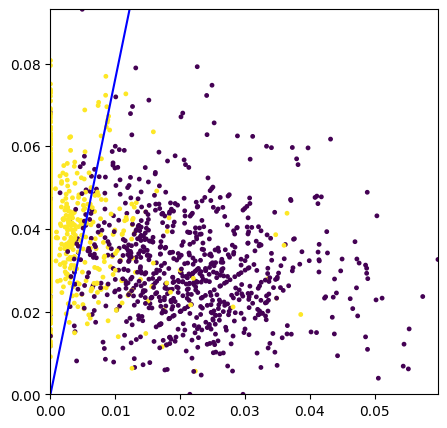

In [8]:
# The perceptron object has a `coef_` attribute that contains the weights of the model
w_0 = perceptron.intercept_[0]
w = perceptron.coef_[0]

# Plot the separating plane
plt.figure(figsize=(5, 5))
plt.scatter(X_train.f_wk, X_train.f_cz, c=y_train=="Spanish", s=6)

lu.plot_line_square(w_0, w, X_train.f_wk.min(), X_train.f_wk.max())

plt.xlim([X_train.f_wk.min(), X_train.f_wk.max()])
plt.ylim([X_train.f_cz.min(), X_train.f_cz.max()])



print(f"Classes={perceptron.classes_}")

The value of the coefficients allows us to define the discriminant function, which will allow us to decide the class of a new observation. 

In [20]:
def disciminant(x1, x2):
    return w_0 + w[0]*x1 + w[1]*x2

disciminant(0.0005, 0.03)

0.03200344904606096

However, `sklearn` provides a method to predict the class of a new observation: `model.predict(X_new)`.

In [21]:

# Make predictions
X_test['f_wk'] = X_test.f_w + X_test.f_k
X_test['f_cz'] = X_test.f_c + X_test.f_z
y_pred = perceptron.predict(X_test[['f_wk', 'f_cz']])


and also for the discriminant function, called `model.decision_function`.

In [23]:
perceptron.decision_function(X_test[['f_wk', 'f_cz']])

array([-0.13531595, -0.24185672,  0.03101382,  0.06268471, -0.35762043,
        0.06715638, -0.19633555, -0.30471702, -0.23035697, -0.15269346,
       -0.23842639, -0.31372743,  0.04243715, -0.22326209,  0.06208341,
       -0.29833247,  0.04418635,  0.05190734, -0.20161501, -0.35607229,
       -0.19964602,  0.03745213,  0.05938734,  0.05749339, -0.16186442,
       -0.23005293, -0.20016416, -0.10450056,  0.03278721, -0.06399123,
        0.01507932, -0.10590003, -0.09432391,  0.05539075, -0.06692372,
       -0.09487234, -0.04896126, -0.15711705,  0.08255352, -0.13376735,
        0.02912124,  0.03804936, -0.16244481, -0.18657178, -0.32003604,
        0.06087897, -0.09001174, -0.25403949, -0.11659798, -0.29151824,
        0.05703342, -0.04105543, -0.04639005, -0.19276581,  0.03573331,
        0.04931197,  0.08218661,  0.03184352, -0.24377362, -0.09423366,
       -0.02673985,  0.05543637,  0.02128188, -0.18116358, -0.17355919,
       -0.15892973, -0.12380504, -0.2393763 , -0.1675633 , -0.16

Calculate the perceptron loss of the model on the whole training set. 

Remember that the perceptron loss for a single item is: 

$$
l_n = max(0, -y_n * d(\vec{x}_n))
$$

Hint. First convert the labels $y_n$ to -1 and +1

> Solution in notebook linear.ipynb

## Activity 3

Assume you have a linear model with discriminant function $d(\vec{x}) = -14.65 x_1 + 23.32 x_2 + 0.04$.

- Calculate the value of the discriminant function for a new point $x_1=0.04, x_2= 0.13$
- Calculate the probability of the point being in class 1. 
- Calculate the final class assigned to the point.
- Assuming the point belongs to class 1, calculate the log loss for the point.
- Now assume the point belongs to class 2, calculate the log loss for the point.